# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
#se buscan los datos que no estan estandarizados
df["species"].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [4]:
#correcciones
vir_malo = [" virginica", "VIRGINICA", "virginica "]
set_malo = ["Setosa", "SETOSA"]
ver_malo = ["Versicolor", "VERSICOLOR"]
malo = [vir_malo,set_malo,ver_malo]
correc = ["virginica","setosa","virginica"]

for grupo in range(3):
    for error in range(len(malo[grupo])):
        df.loc[df["species"] == malo[grupo][error] , "species"] = correc[grupo]

df.loc[df["species"].isnull() ,"species"] = 'default'


df["species"].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

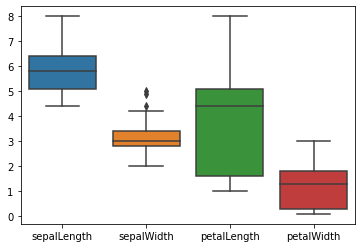

In [5]:
#grafico
for col in df.columns:
    df.loc[df[col] == 0 , col] = np.nan
sns.boxplot(data=df)
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [6]:
#se definen los limites
limit=dict()
limit["sepalLength"] = [4.0 , 7.0]
limit["sepalWidth"] = [2.0 , 4.5]
limit["petalLength"] = [1.0 , 7.0]
limit["petalWidth"] = [0.1 , 2.5]

#se crea el dataset con etiqueta
label = pd.DataFrame(np.nan,range(df.shape[0]),["label"])
df_labeled = pd.concat([df,label],axis=1)

In [8]:
#etiquetado
for col in df_labeled.drop(["species","label"],axis=1).columns:
    df_labeled.loc[~df_labeled[col].between(limit[col][0],limit[col][1]), "label"] = col
df_labeled.loc[df_labeled["label"].isnull() ,"label"] = 'none'
df_labeled.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalWidth
1,7.2,3.6,6.1,2.5,virginica,sepalLength
2,6.3,3.3,6.0,2.5,virginica,none
3,6.7,3.3,5.7,2.5,virginica,none
4,6.3,3.4,5.6,2.4,virginica,none


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

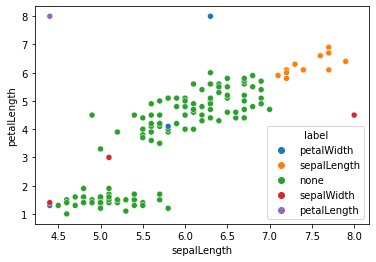

In [9]:
#grafico
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue="label",
    data = df_labeled
)   
plt.show()

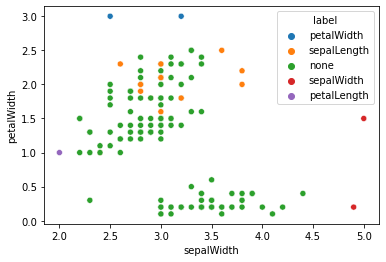

In [10]:
#grafico
sns.scatterplot(
    x='sepalWidth',
    y='petalWidth',
    hue="label",
    data = df_labeled
)   
plt.show()

Hay datos que son outliers para un grafico pero no necesariamente para el otro, por lo que es mejor eliminarlos todos.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [11]:
#limpieza final

outl = ["sepalLength","sepalWidth","petalLength","petalWidth"]
df_clean = df_labeled
for dim in outl:
    df_clean = df_clean.loc[~df_clean[["label"]].eq(dim).any(1)]
df_clean = df_clean.loc[~df_clean[["species"]].eq("default").any(1)]

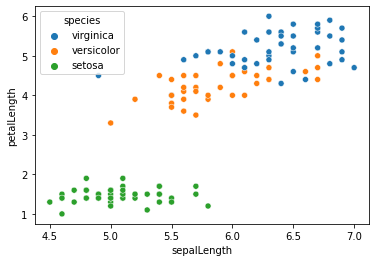

In [12]:
#grafico
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue="species",
    data = df_clean
)   
plt.show()